<a href="https://colab.research.google.com/github/gustavohn73/Complete-Python-3-Bootcamp/blob/master/Alura_mod_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulo 1

Importação e tratativa dos dados.

In [139]:
#configurações iniciais

import pandas as pd

pd.options.display.float_format = "{:.2f}".format

###Imports

In [140]:
#Leitura de dados SRAG

dados_srag = pd.read_csv("/content/drive/MyDrive/Covid/20210528_SRAG.csv", encoding="UTF-8", 
                    skiprows = 0, sep=";", skipfooter=0)

###DateTime

In [141]:
#Trabalhando com DateTime

import datetime

#Formatando Coluna para Datetime
dados_srag["Data de Notificação"] = pd.to_datetime(dados_srag["Data de Notificação"], format="%d/%m/%Y", errors="ignore")

#colocar mes e ano
dados_srag['ano'] = dados_srag["Data de Notificação"].dt.year
dados_srag['mes'] = dados_srag["Data de Notificação"].dt.month
dados_srag['mes_ano'] = dados_srag["Data de Notificação"].dt.strftime('%b/%Y')

###Ajustes de nomes de Colunas

Trabalhando com a tabela temporária "a"

In [142]:
#verificando os nomes das colunas
dados_srag.columns

Index(['Municípios', 'Sg Uf', 'Nu Idade N', 'Grupo de Idades', 'Cs Sexo',
       'Cs Raca', 'OUTRAS SRAG', 'Evolução', 'Quantidade Homens',
       'Quantidade Mulheres', 'Quantidade de Casos', 'Cs Raca_ID',
       'Cs Sexo_ID', 'Data de Notificação', 'Faixa etária',
       'EVOLUCAO_NOT_NULL', 'Última Data de Notificação', 'ano', 'mes',
       'mes_ano'],
      dtype='object')

In [143]:
#Renomeando as colunas
a = dados_srag.rename(columns={'Municípios' : 'cidade', 'Sg Uf' : "uf", 'Nu Idade N' : 'idade', 'Grupo de Idades': 'g_idade', 'Cs Sexo': 'sexo', 'Cs Raca': 'cor', 'OUTRAS SRAG' : 'srag', 'Evolução' : 'evolucao', 'Data de Notificação' : 'dt_notificacao'})
a.head()

,cidade,uf,idade,g_idade,sexo,cor,srag,evolucao,Quantidade Homens,Quantidade Mulheres,Quantidade de Casos,Cs Raca_ID,Cs Sexo_ID,dt_notificacao,Faixa etária,EVOLUCAO_NOT_NULL,Última Data de Notificação,ano,mes,mes_ano
0,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-08,70,1,29/09/2020,2020,8,Aug/2020
1,HORTOLANDIA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-11,70,1,29/09/2020,2020,8,Aug/2020
2,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-12,70,1,29/09/2020,2020,8,Aug/2020
3,CARAGUATATUBA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-14,70,1,29/09/2020,2020,8,Aug/2020
4,GUARULHOS,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-19,70,1,29/09/2020,2020,8,Aug/2020


In [144]:
#Removendo colunas desnecessárias
a = a[[ 'cidade', 'uf','idade', 'g_idade', 'sexo', 'cor', 'srag', 'evolucao', 'dt_notificacao', 'ano', 'mes', 'mes_ano']]
a.head()

,cidade,uf,idade,g_idade,sexo,cor,srag,evolucao,dt_notificacao,ano,mes,mes_ano
0,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,2020-08-08,2020,8,Aug/2020
1,HORTOLANDIA,SP,71,70,Feminino,Parda,COVID 19,Cura,2020-08-11,2020,8,Aug/2020
2,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,2020-08-12,2020,8,Aug/2020
3,CARAGUATATUBA,SP,71,70,Feminino,Parda,COVID 19,Cura,2020-08-14,2020,8,Aug/2020
4,GUARULHOS,SP,71,70,Feminino,Parda,COVID 19,Cura,2020-08-19,2020,8,Aug/2020


In [145]:
#Os dados possui informações de cidades que não são do estado de SP
a.groupby(["uf"]).size()

uf
AC          55
AL          61
AM         300
AP          20
BA         118
CE          37
DF          55
ES          84
GO         243
MA         108
MG        1307
MS         419
MT         446
None        26
PA         363
PB          64
PE          55
PI          53
PR         309
RJ         232
RN          18
RO         160
RR          23
RS          63
SC         133
SE          18
SP      640491
TO          84
dtype: int64

###Filtros

In [146]:

#Somente estado de SP e remove coluna
a = a.loc[a.uf == "SP"].drop( columns = "uf")

#filtrar de SRAG para COVID e remove colula
a = a.loc[(a.srag == "COVID 19")].drop( columns = "srag")

#filtrar de Evolução (removendo "Em avaliação")
a = a.loc[(a.evolucao != "Em avaliação")]

#Garantindo ano de 2020/2021
a = a.loc[(a.ano == 2020) | (a.ano == 2021)]
a

,cidade,idade,g_idade,sexo,cor,evolucao,dt_notificacao,ano,mes,mes_ano
0,SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-08,2020,8,Aug/2020
1,HORTOLANDIA,71,70,Feminino,Parda,Cura,2020-08-11,2020,8,Aug/2020
2,SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-12,2020,8,Aug/2020
3,CARAGUATATUBA,71,70,Feminino,Parda,Cura,2020-08-14,2020,8,Aug/2020
4,GUARULHOS,71,70,Feminino,Parda,Cura,2020-08-19,2020,8,Aug/2020
...,...,...,...,...,...,...,...,...,...,...
645340,SANTA BARBARA D'OESTE,67,65,Feminino,Parda,Cura,2020-06-29,2020,6,Jun/2020
645341,SAO PAULO,67,65,Feminino,Parda,Cura,2020-06-29,2020,6,Jun/2020
645342,VOTUPORANGA,67,65,Feminino,Parda,Cura,2020-06-29,2020,6,Jun/2020
645343,CARAPICUIBA,67,65,Feminino,Parda,Cura,2020-07-01,2020,7,Jul/2020


In [147]:
#Armazenando df provisório no df principal.
dados_srag = a
dados_srag.head()

,cidade,idade,g_idade,sexo,cor,evolucao,dt_notificacao,ano,mes,mes_ano
0,SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-08,2020,8,Aug/2020
1,HORTOLANDIA,71,70,Feminino,Parda,Cura,2020-08-11,2020,8,Aug/2020
2,SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-12,2020,8,Aug/2020
3,CARAGUATATUBA,71,70,Feminino,Parda,Cura,2020-08-14,2020,8,Aug/2020
4,GUARULHOS,71,70,Feminino,Parda,Cura,2020-08-19,2020,8,Aug/2020


#Módulo 2 - Seaborn e Matplotlib

##Aula 1 - Fontes Externas, Limpeza e Manutenção de dados


Para dados alternativos vou fazer a inclusão dos dados populacional da cidade das cidades do estado de S.P.
Embora eu esteja focando nas cidades de Colina e Barretos, para fins de estudo fazer a inclusão de todas as cidades.

Fonte dos dados (https://cidades.ibge.gov.br/brasil/sp/panorama)

###Import

####Via Web

O código da página não carrega por completo (Uso de Java)

In [148]:
#importando o arquivo
#from urllib.request import urlopen

#url_pop = "https://cidades.ibge.gov.br/brasil/sintese/sp?indicadores=29171,28242,30255,29765,29763"

#page = urlopen(url_pop)

#html_bytes = page.read()
#html_pop = html_bytes.decode("utf-8")

####Via arquivo HTML salvo

Tabela muito grande para copiar e colar, então fazendo importação direto do HTML

In [149]:
#from urllib.request import urlopen
#import codecs

url_pop = "/content/drive/MyDrive/Covid/sp_pop.html"

#page = codecs.open(url_pop, 'r')
#html_pop = page.read()

dados_pop = pd.read_html(url_pop, decimal=",")
dados_pop = dados_pop[0]

#removendo coluna "Gentílico"
dados_pop = dados_pop.drop(columns= ["Gentílico"])

#Trocando os nomes das colunas
dados_pop = dados_pop.rename(columns= {"Municípios":"cidade","Estabelecimentos de Saúde SUS":"sus","População estimada":"populacao" ,"Pessoal ocupado":"ocupado","Salário médio mensal dos trabalhadores formais":"salario", "Índice de Desenvolvimento Humano Municipal (IDHM)":"idhm"})


#pagando a ultima linha
dados_pop = dados_pop.drop(dados_pop["sus"].count()-1)

In [150]:
dados_pop.head()

,cidade,sus,populacao,ocupado,salario,idhm
0,Adamantina,8 estabelecimentos,35111 pessoas,12292 pessoas,"2,1 salários mínimos",0790
1,Adolfo,1 estabelecimentos,3554 pessoas,617 pessoas,"2,1 salários mínimos",0730
2,Aguaí,12 estabelecimentos,36648 pessoas,6515 pessoas,"2,3 salários mínimos",0715
3,Águas da Prata,4 estabelecimentos,8221 pessoas,1048 pessoas,"2,0 salários mínimos",0781
4,Águas de Lindóia,9 estabelecimentos,18808 pessoas,5709 pessoas,"2,0 salários mínimos",0745


###Tratativa dos dados

####Correção de números

De String para float ou int


In [151]:
import re

pd.options.display.float_format = "{:.3f}".format

#Corrigindo dados da Colunas 
c = ["sus", "populacao", "ocupado"]

for a in c:
  for x in dados_pop.index:
    dados_pop[a][x] = int(re.sub(r'[a-z]+', '', dados_pop[a][x]))

#corrigindo dados da coluna salario
a = "salario"
for x in dados_pop.index:
  dados_pop[a][x] = float(re.sub(r'[a-z,á,í]+', '', dados_pop[a][x]))/10

#corrigindo dados da coluna idhm
a = "idhm"
for x in dados_pop.index:
  dados_pop[a][x] = float(dados_pop[a][x])/1000



In [152]:
dados_pop.head()

,cidade,sus,populacao,ocupado,salario,idhm
0,Adamantina,8,35111,12292,2.100,0.790
1,Adolfo,1,3554,617,2.100,0.730
2,Aguaí,12,36648,6515,2.300,0.715
3,Águas da Prata,4,8221,1048,2.000,0.781
4,Águas de Lindóia,9,18808,5709,2.000,0.745


####Correção de Texto

Removendo acentuação e colocando em caixa alta.

In [153]:
import unicodedata

# Retirando os acentos

def remove_acento(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

for t in dados_pop.index:
  dados_pop["cidade"][t] = remove_acento(dados_pop["cidade"][t])
  #colocando em caixa alta
  dados_pop["cidade"][t] = dados_pop["cidade"][t].upper()
dados_pop.head()

,cidade,sus,populacao,ocupado,salario,idhm
0,ADAMANTINA,8,35111,12292,2.100,0.790
1,ADOLFO,1,3554,617,2.100,0.730
2,AGUAI,12,36648,6515,2.300,0.715
3,AGUAS DA PRATA,4,8221,1048,2.000,0.781
4,AGUAS DE LINDOIA,9,18808,5709,2.000,0.745


###Index

Criando index para as cidades

####Dataframe Pop

In [154]:
#Colocando municipio como index
dados_pop =  dados_pop.set_index('cidade')
#dados_pop = dados_pop.reset_index()
dados_pop.head()

,sus,populacao,ocupado,salario,idhm
cidade,,,,,
ADAMANTINA,8,35111,12292,2.100,0.790
ADOLFO,1,3554,617,2.100,0.730
AGUAI,12,36648,6515,2.300,0.715
AGUAS DA PRATA,4,8221,1048,2.000,0.781
AGUAS DE LINDOIA,9,18808,5709,2.000,0.745


####Dataframe SRAG



In [155]:
#Colocando a cidade como index

dados_srag = dados_srag.set_index("cidade")
dados_srag.head()

,idade,g_idade,sexo,cor,evolucao,dt_notificacao,ano,mes,mes_ano
cidade,,,,,,,,,
SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-08,2020,8,Aug/2020
HORTOLANDIA,71,70,Feminino,Parda,Cura,2020-08-11,2020,8,Aug/2020
SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-12,2020,8,Aug/2020
CARAGUATATUBA,71,70,Feminino,Parda,Cura,2020-08-14,2020,8,Aug/2020
GUARULHOS,71,70,Feminino,Parda,Cura,2020-08-19,2020,8,Aug/2020


#####**Tabela Resumo**

Criação de uma tabela com os valores totais de casos.

In [156]:
#confirmando as possibilidades de evolução
dados_srag.groupby(["evolucao"]).size()

evolucao
Cura     237171
Óbito    111852
dtype: int64

**Gerando dados:**
- **tx_curados**: Percentual das pessoas contaminadas que se curaram.
- **tx_mortalidade**: percentual das pessoas que faleceram decorrente de covid.


In [157]:
bd_a = dados_srag.groupby(["cidade"]).size().to_frame()
bd_a.columns = ["covid"]
bd_b = dados_srag.loc[(dados_srag.evolucao == "Cura")].groupby(["cidade"]).size().to_frame()
bd_b.columns = ["covid_curados"]
bd = bd_a.join(bd_b)
bd["covid"] = bd["covid"].astype(float)
bd["covid_mortes"] = bd["covid"] - bd["covid_curados"]
bd["tx_mortalidade"] = bd["covid_mortes"] / bd["covid"]

bd


,covid,covid_curados,covid_mortes,tx_mortalidade
cidade,,,,
ADAMANTINA,295.000,215.000,80.000,0.271
ADOLFO,46.000,35.000,11.000,0.239
AGUAI,151.000,71.000,80.000,0.530
AGUAS DA PRATA,50.000,29.000,21.000,0.420
AGUAS DE LINDOIA,116.000,85.000,31.000,0.267
...,...,...,...,...
VISTA ALEGRE DO ALTO,31.000,21.000,10.000,0.323
VITORIA BRASIL,12.000,5.000,7.000,0.583
VOTORANTIM,1068.000,715.000,353.000,0.331


###Join

Join do df de Resumo (bd) com o de População (dados_pop), df que será usado para trabalhar com os dados no futuro.

In [158]:
db_uso = bd.join(dados_pop)

In [159]:
db_uso = db_uso.reset_index()
db_uso = db_uso.set_index("cidade")
db_uso

,covid,covid_curados,covid_mortes,tx_mortalidade,sus,populacao,ocupado,salario,idhm
cidade,,,,,,,,,
ADAMANTINA,295.000,215.000,80.000,0.271,8,35111,12292,2.100,0.790
ADOLFO,46.000,35.000,11.000,0.239,1,3554,617,2.100,0.730
AGUAI,151.000,71.000,80.000,0.530,12,36648,6515,2.300,0.715
AGUAS DA PRATA,50.000,29.000,21.000,0.420,4,8221,1048,2.000,0.781
AGUAS DE LINDOIA,116.000,85.000,31.000,0.267,9,18808,5709,2.000,0.745
...,...,...,...,...,...,...,...,...,...
VISTA ALEGRE DO ALTO,31.000,21.000,10.000,0.323,3,8989,3158,3.100,0.744
VITORIA BRASIL,12.000,5.000,7.000,0.583,1,1846,258,2.400,0.725
VOTORANTIM,1068.000,715.000,353.000,0.331,15,123599,21563,2.700,0.767


In [160]:
#db_uso = db_uso.drop(columns = "index")
db_uso

,covid,covid_curados,covid_mortes,tx_mortalidade,sus,populacao,ocupado,salario,idhm
cidade,,,,,,,,,
ADAMANTINA,295.000,215.000,80.000,0.271,8,35111,12292,2.100,0.790
ADOLFO,46.000,35.000,11.000,0.239,1,3554,617,2.100,0.730
AGUAI,151.000,71.000,80.000,0.530,12,36648,6515,2.300,0.715
AGUAS DA PRATA,50.000,29.000,21.000,0.420,4,8221,1048,2.000,0.781
AGUAS DE LINDOIA,116.000,85.000,31.000,0.267,9,18808,5709,2.000,0.745
...,...,...,...,...,...,...,...,...,...
VISTA ALEGRE DO ALTO,31.000,21.000,10.000,0.323,3,8989,3158,3.100,0.744
VITORIA BRASIL,12.000,5.000,7.000,0.583,1,1846,258,2.400,0.725
VOTORANTIM,1068.000,715.000,353.000,0.331,15,123599,21563,2.700,0.767


In [161]:
db_uso.loc[(db_uso.index == "COLINA") | (db_uso.index == "BARRETOS") | (db_uso.index == "RIBEIRAO PRETO")]

,covid,covid_curados,covid_mortes,tx_mortalidade,sus,populacao,ocupado,salario,idhm
cidade,,,,,,,,,
BARRETOS,909.000,537.000,372.000,0.409,35,122833,33400,2.500,0.789
COLINA,147.000,104.000,43.000,0.293,9,18535,5389,2.400,0.757
RIBEIRAO PRETO,6175.000,4004.000,2171.000,0.352,95,711825,270748,2.900,0.800


###Desafios

####Desafio 01
Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

`Feito no import via web. Coletando do site do IBGE.`

####Desafio 02
Neste desafio temos uma série de passos:

1.   Padronizar os nomes das colunas
2.   Transformar os dados nos tipos corretos
3.   Transformar a UF em index

`1. Feito no item Ajustes de nomes de colunas`

`2. Feito no item trativa dos dodos`

`3. Feito no item Index`

####Desafio 03
Buscar na documentação alguns métodos envolvendo strings

`Busquei na documentação várias vezes, inclusive no item Correção de Texto que precisei corrigir acentuação`

####Desafio 04
Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

`Não desenvolvi função para isso, mas usei função no item Correção de Texto para retirar pontuação`

## Aula 2 -  Proporcionalidade e Seaborn

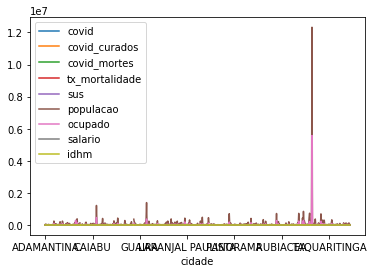

In [162]:
db_uso.plot()

**Gerando dados:**

- **Tx_covid**: Percentualda população da cidade contagiada pelo Covid, independente da evolução

In [163]:
db_uso["tx_covid"] = db_uso["covid"] / db_uso["populacao"]

db_uso.head()

,covid,covid_curados,covid_mortes,tx_mortalidade,sus,populacao,ocupado,salario,idhm,tx_covid
cidade,,,,,,,,,,
ADAMANTINA,295.000,215.000,80.000,0.271,8,35111,12292,2.100,0.790,0.008
ADOLFO,46.000,35.000,11.000,0.239,1,3554,617,2.100,0.730,0.013
AGUAI,151.000,71.000,80.000,0.530,12,36648,6515,2.300,0.715,0.004
AGUAS DA PRATA,50.000,29.000,21.000,0.420,4,8221,1048,2.000,0.781,0.006
AGUAS DE LINDOIA,116.000,85.000,31.000,0.267,9,18808,5709,2.000,0.745,0.006


Verificando para as cidades da região de interesse.

In [164]:
db_uso.loc[(db_uso.index == "COLINA") | (db_uso.index == "BARRETOS") | (db_uso.index == "RIBEIRAO PRETO")]

,covid,covid_curados,covid_mortes,tx_mortalidade,sus,populacao,ocupado,salario,idhm,tx_covid
cidade,,,,,,,,,,
BARRETOS,909.000,537.000,372.000,0.409,35,122833,33400,2.500,0.789,0.007
COLINA,147.000,104.000,43.000,0.293,9,18535,5389,2.400,0.757,0.008
RIBEIRAO PRETO,6175.000,4004.000,2171.000,0.352,95,711825,270748,2.900,0.800,0.009


###Seaborn

**Verificando** possível correlação entre o tamanho da população e quantidade de casos

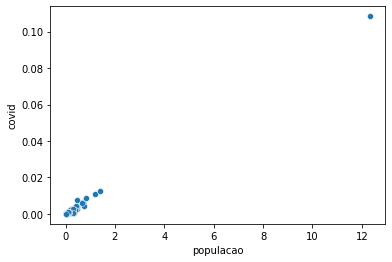

In [165]:
import seaborn as sns

sns.scatterplot(data=db_uso, x=db_uso["populacao"]/1000000, y= db_uso["covid"]/1000000)

**Verificando** possível correlação entre o IDHM da cidade com a tx de mortalidade.

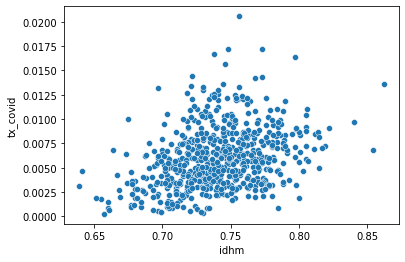

In [166]:
sns.scatterplot(data=db_uso, x=db_uso["idhm"], y= db_uso["tx_covid"])

###Desafios

####Desafio 01

Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

####Desafio 02

(Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

####Desafio 03

(Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

##Aula 3 - Tickets, escalas e formatação de imagem.

###Criando tabelas evolutivas (Mês)


Usarei os dados da tabela "dados_srag" que já estão previamente filtrados.
   



In [167]:
dados_srag.head()

,idade,g_idade,sexo,cor,evolucao,dt_notificacao,ano,mes,mes_ano
cidade,,,,,,,,,
SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-08,2020,8,Aug/2020
HORTOLANDIA,71,70,Feminino,Parda,Cura,2020-08-11,2020,8,Aug/2020
SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-12,2020,8,Aug/2020
CARAGUATATUBA,71,70,Feminino,Parda,Cura,2020-08-14,2020,8,Aug/2020
GUARULHOS,71,70,Feminino,Parda,Cura,2020-08-19,2020,8,Aug/2020


Criando as tabelas em um formato parecido com a tabela da aula

In [168]:
#lista de cidades
bd_i = dados_srag.groupby(["cidade"]).size().to_frame().index
bd_srag = dados_srag.reset_index()

In [169]:
#tabela total
total_covid = bd_srag.sort_values(by='dt_notificacao').groupby(["mes_ano"], sort = False).size().to_frame()
total_covid.columns = ["total"]

for a in bd_i:
  bd_a = bd_srag.loc[bd_srag.cidade == a].groupby("mes_ano").size().to_frame()
  bd_a.columns = [a]
  total_covid = total_covid.join(bd_a)

total_covid.head()

,total,ADAMANTINA,ADOLFO,AGUAI,AGUAS DA PRATA,AGUAS DE LINDOIA,AGUAS DE SANTA BARBARA,AGUAS DE SAO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINOPOLIS,ALTO ALEGRE,ALUMINIO,ALVARES FLORENCE,ALVARES MACHADO,ALVARO DE CARVALHO,ALVINLANDIA,AMERICANA,AMERICO BRASILIENSE,AMERICO DE CAMPOS,AMPARO,ANALANDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAI,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARAMINA,ARANDU,ARAPEI,ARARAQUARA,ARARAS,ARCO-IRIS,...,TATUI,TAUBATE,TEJUPA,TEODORO SAMPAIO,TERRA ROXA,TIETE,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBE,TRES FRONTEIRAS,TUIUTI,TUPA,TUPI PAULISTA,TURIUBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIAO PAULISTA,URANIA,URU,URUPES,VALENTIM GENTIL,VALINHOS,VALPARAISO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITORIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS
mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan/2020,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Feb/2020,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mar/2020,4162,nan,nan,nan,1.000,1.000,nan,nan,3.000,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,5.000,nan,1.000,1.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,7.000,nan,nan,2.000,nan,9.000,1.000,nan,...,2.000,10.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,3.000,2.000,nan,4.000,nan,nan,nan,3.000,6.000,nan
Apr/2020,15494,6.000,nan,4.000,nan,3.000,nan,nan,8.000,nan,nan,nan,nan,nan,nan,nan,3.000,nan,nan,4.000,3.000,nan,3.000,nan,12.000,3.000,nan,nan,nan,nan,nan,4.000,13.000,3.000,nan,2.000,nan,7.000,20.000,nan,...,15.000,26.000,nan,nan,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,3.000,2.000,nan,nan,nan,3.000,nan,nan,nan,nan,nan,nan,1.000,16.000,nan,nan,nan,8.000,20.000,nan,7.000,1.000,1.000,nan,6.000,2.000,nan
May/2020,25408,7.000,1.000,2.000,1.000,1.000,nan,nan,2.000,1.000,2.000,1.000,1.000,1.000,6.000,nan,5.000,1.000,nan,38.000,3.000,nan,16.000,nan,4.000,3.000,nan,1.000,4.000,nan,nan,7.000,24.000,8.000,nan,nan,1.000,9.000,22.000,nan,...,28.000,43.000,nan,4.000,nan,2.000,nan,1.000,1.000,nan,3.000,1.000,nan,8.000,4.000,1.000,1.000,nan,12.000,2.000,2.000,nan,3.000,1.000,nan,1.000,46.000,7.000,1.000,3.000,25.000,42.000,nan,13.000,2.000,1.000,nan,43.000,14.000,1.000


In [170]:
#tabela Cura
cura_covid = bd_srag.sort_values(by="dt_notificacao").loc[(bd_srag.evolucao == "Cura")].groupby(["mes_ano"], sort = False).size().to_frame()
cura_covid.columns = ["total"]

for a in bd_i:
  bd_a = bd_srag.loc[(bd_srag.cidade == a) & (bd_srag.evolucao == "Cura")].groupby("mes_ano").size().to_frame()
  bd_a.columns = [a]
  cura_covid = cura_covid.join(bd_a)

cura_covid.head()

,total,ADAMANTINA,ADOLFO,AGUAI,AGUAS DA PRATA,AGUAS DE LINDOIA,AGUAS DE SANTA BARBARA,AGUAS DE SAO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINOPOLIS,ALTO ALEGRE,ALUMINIO,ALVARES FLORENCE,ALVARES MACHADO,ALVARO DE CARVALHO,ALVINLANDIA,AMERICANA,AMERICO BRASILIENSE,AMERICO DE CAMPOS,AMPARO,ANALANDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAI,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARAMINA,ARANDU,ARAPEI,ARARAQUARA,ARARAS,ARCO-IRIS,...,TATUI,TAUBATE,TEJUPA,TEODORO SAMPAIO,TERRA ROXA,TIETE,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBE,TRES FRONTEIRAS,TUIUTI,TUPA,TUPI PAULISTA,TURIUBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIAO PAULISTA,URANIA,URU,URUPES,VALENTIM GENTIL,VALINHOS,VALPARAISO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITORIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS
mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan/2020,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Feb/2020,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mar/2020,2986,nan,nan,nan,1.000,nan,nan,nan,2.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.000,nan,1.000,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,7.000,nan,nan,nan,nan,6.000,1.000,nan,...,2.000,8.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,nan,3.000,nan,nan,nan,2.000,6.000,nan
Apr/2020,11093,5.000,nan,1.000,nan,3.000,nan,nan,8.000,nan,nan,nan,nan,nan,nan,nan,3.000,nan,nan,2.000,3.000,nan,3.000,nan,11.000,2.000,nan,nan,nan,nan,nan,3.000,9.000,3.000,nan,1.000,nan,6.000,18.000,nan,...,12.000,24.000,nan,nan,1.000,nan,nan,nan,1.000,nan,nan,nan,nan,2.000,2.000,nan,nan,nan,3.000,nan,nan,nan,nan,nan,nan,1.000,14.000,nan,nan,nan,6.000,14.000,nan,7.000,nan,1.000,nan,4.000,2.000,nan
May/2020,17724,5.000,1.000,nan,nan,nan,nan,nan,2.000,nan,nan,1.000,1.000,nan,4.000,nan,4.000,nan,nan,28.000,1.000,nan,10.000,nan,2.000,2.000,nan,1.000,4.000,nan,nan,6.000,18.000,5.000,nan,nan,nan,7.000,19.000,nan,...,16.000,34.000,nan,4.000,nan,2.000,nan,nan,1.000,nan,3.000,1.000,nan,7.000,4.000,nan,1.000,nan,8.000,1.000,1.000,nan,nan,nan,nan,1.000,38.000,6.000,1.000,3.000,17.000,27.000,nan,10.000,1.000,nan,nan,33.000,6.000,1.000


In [171]:
#Tabela Obito
obito_covid = bd_srag.sort_values(by="dt_notificacao").loc[(bd_srag.evolucao == "Óbito")].groupby(["mes_ano"], sort = False).size().to_frame()
obito_covid.columns = ["total"]

for a in bd_i:
  bd_a = bd_srag.loc[(bd_srag.cidade == a) & (bd_srag.evolucao == "Óbito")].groupby("mes_ano").size().to_frame()
  bd_a.columns = [a]
  obito_covid = obito_covid.join(bd_a)

obito_covid.head()

,total,ADAMANTINA,ADOLFO,AGUAI,AGUAS DA PRATA,AGUAS DE LINDOIA,AGUAS DE SANTA BARBARA,AGUAS DE SAO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINOPOLIS,ALTO ALEGRE,ALUMINIO,ALVARES FLORENCE,ALVARES MACHADO,ALVARO DE CARVALHO,ALVINLANDIA,AMERICANA,AMERICO BRASILIENSE,AMERICO DE CAMPOS,AMPARO,ANALANDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAI,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARAMINA,ARANDU,ARAPEI,ARARAQUARA,ARARAS,ARCO-IRIS,...,TATUI,TAUBATE,TEJUPA,TEODORO SAMPAIO,TERRA ROXA,TIETE,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBE,TRES FRONTEIRAS,TUIUTI,TUPA,TUPI PAULISTA,TURIUBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIAO PAULISTA,URANIA,URU,URUPES,VALENTIM GENTIL,VALINHOS,VALPARAISO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITORIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS
mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan/2020,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Feb/2020,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mar/2020,1174,nan,nan,nan,nan,1.000,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,2.000,nan,nan,1.000,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,3.000,nan,nan,...,nan,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,2.000,1.000,nan,1.000,nan,nan,nan,1.000,nan,nan
Apr/2020,4393,1.000,nan,3.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,nan,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,1.000,4.000,nan,nan,1.000,nan,1.000,2.000,nan,...,3.000,2.000,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,nan,nan,2.000,6.000,nan,nan,1.000,nan,nan,2.000,nan,nan
May/2020,7671,2.000,nan,2.000,1.000,1.000,nan,nan,nan,1.000,2.000,nan,nan,1.000,2.000,nan,1.000,1.000,nan,10.000,2.000,nan,6.000,nan,2.000,1.000,nan,nan,nan,nan,nan,1.000,6.000,3.000,nan,nan,1.000,2.000,3.000,nan,...,12.000,9.000,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,1.000,nan,1.000,nan,nan,4.000,1.000,1.000,nan,3.000,1.000,nan,nan,8.000,1.000,nan,nan,8.000,15.000,nan,3.000,1.000,1.000,nan,10.000,8.000,nan


###Formatação de Gráficos

####Bibliotecas


In [172]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

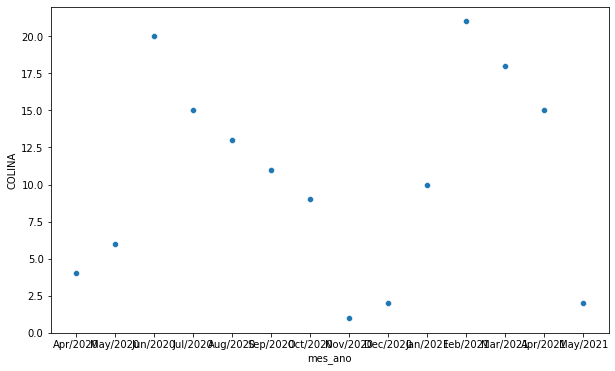

In [173]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])

####Lineplot

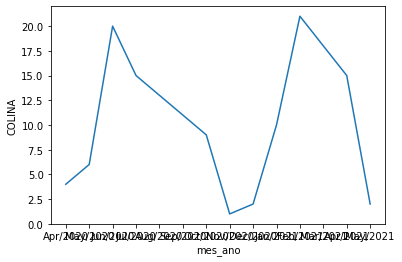

In [174]:
sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])

####Figsize

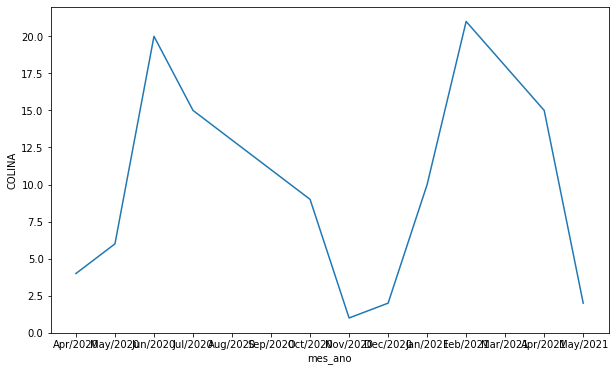

In [175]:
plt.figure(figsize=(10,6))
sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])


####Xticks

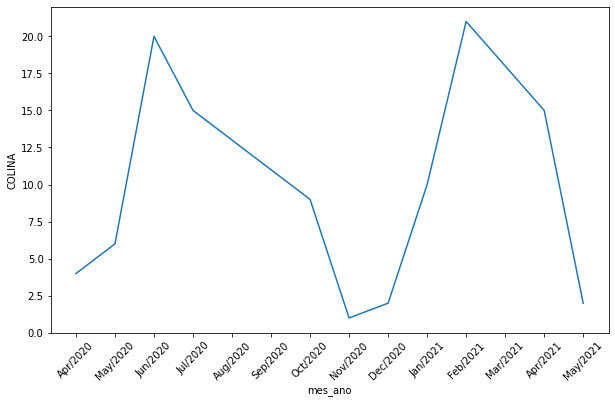

In [176]:
plt.figure(figsize=(10,6))
sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])
plt.xticks(rotation=45)
plt.show()

####Ticker - AutoLocator

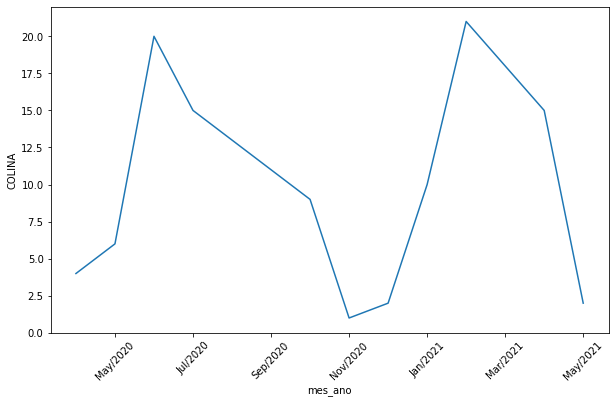

In [177]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

####Ticker - IndexLocator



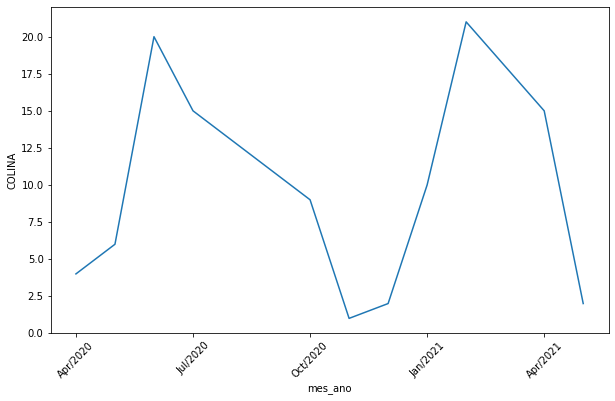

In [178]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
plt.show()

####Grid

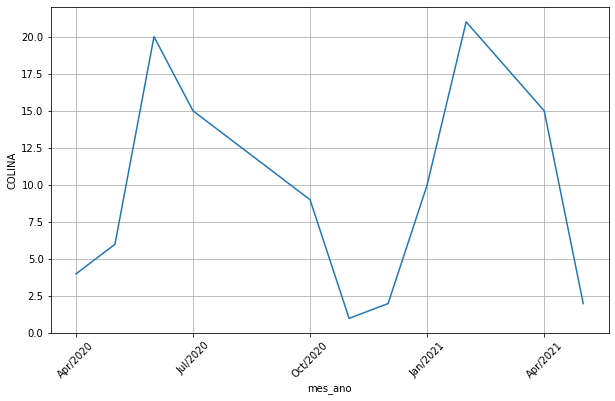

In [179]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
plt.grid(True)
plt.show()

Ylim

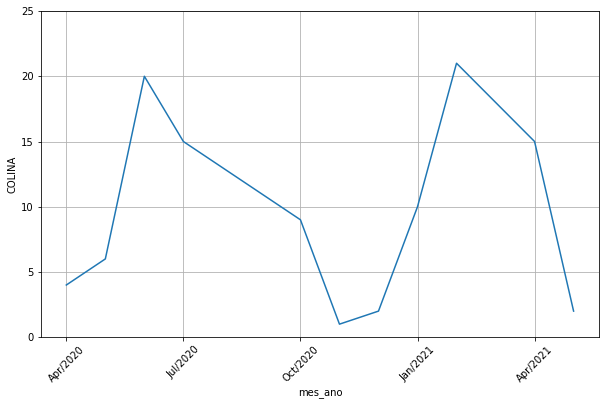

In [180]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
plt.ylim(0, 25)
plt.grid(True)
plt.show()

###Desafios

####Desafio 01
Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.



```
# Feito usando tabelas diferente...
```



####Desafio 02

Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

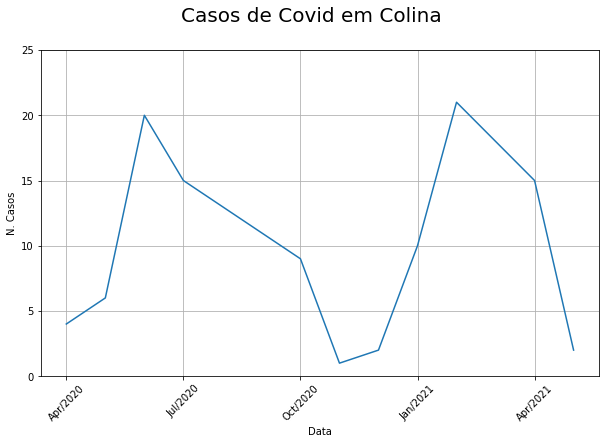

In [181]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["COLINA"])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
plt.ylim(0, 25)
plt.grid(True)
plt.suptitle("Casos de Covid em Colina", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Data" , fontsize=10)
plt.show()

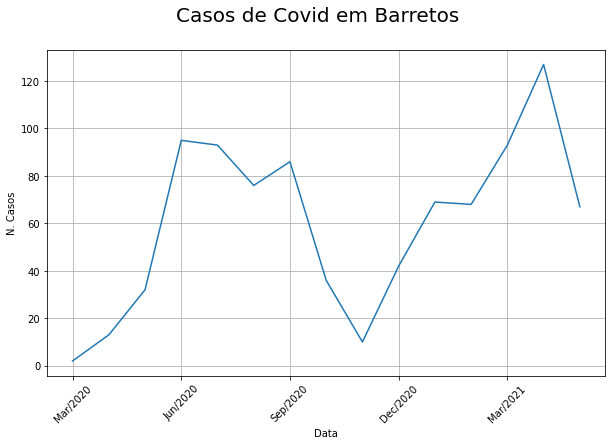

In [182]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["BARRETOS"])
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
#plt.ylim(0, 100)
plt.grid(True)
plt.suptitle("Casos de Covid em Barretos", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Data" , fontsize=10)
plt.show()

## Aula 4 - Trabalhando com DateTime e Melt

### Datas com Datetime

A transformação de dados já foi feita anteriormente, e no entanto a função de estudo refiz.

In [183]:
# Já importantei anteriormente
#import datetime

In [184]:
total_covid

,total,ADAMANTINA,ADOLFO,AGUAI,AGUAS DA PRATA,AGUAS DE LINDOIA,AGUAS DE SANTA BARBARA,AGUAS DE SAO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINOPOLIS,ALTO ALEGRE,ALUMINIO,ALVARES FLORENCE,ALVARES MACHADO,ALVARO DE CARVALHO,ALVINLANDIA,AMERICANA,AMERICO BRASILIENSE,AMERICO DE CAMPOS,AMPARO,ANALANDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAI,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARAMINA,ARANDU,ARAPEI,ARARAQUARA,ARARAS,ARCO-IRIS,...,TATUI,TAUBATE,TEJUPA,TEODORO SAMPAIO,TERRA ROXA,TIETE,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBE,TRES FRONTEIRAS,TUIUTI,TUPA,TUPI PAULISTA,TURIUBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIAO PAULISTA,URANIA,URU,URUPES,VALENTIM GENTIL,VALINHOS,VALPARAISO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITORIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS
mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan/2020,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Feb/2020,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mar/2020,4162,nan,nan,nan,1.000,1.000,nan,nan,3.000,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,5.000,nan,1.000,1.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,7.000,nan,nan,2.000,nan,9.000,1.000,nan,...,2.000,10.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,3.000,2.000,nan,4.000,nan,nan,nan,3.000,6.000,nan
Apr/2020,15494,6.000,nan,4.000,nan,3.000,nan,nan,8.000,nan,nan,nan,nan,nan,nan,nan,3.000,nan,nan,4.000,3.000,nan,3.000,nan,12.000,3.000,nan,nan,nan,nan,nan,4.000,13.000,3.000,nan,2.000,nan,7.000,20.000,nan,...,15.000,26.000,nan,nan,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,3.000,2.000,nan,nan,nan,3.000,nan,nan,nan,nan,nan,nan,1.000,16.000,nan,nan,nan,8.000,20.000,nan,7.000,1.000,1.000,nan,6.000,2.000,nan
May/2020,25408,7.000,1.000,2.000,1.000,1.000,nan,nan,2.000,1.000,2.000,1.000,1.000,1.000,6.000,nan,5.000,1.000,nan,38.000,3.000,nan,16.000,nan,4.000,3.000,nan,1.000,4.000,nan,nan,7.000,24.000,8.000,nan,nan,1.000,9.000,22.000,nan,...,28.000,43.000,nan,4.000,nan,2.000,nan,1.000,1.000,nan,3.000,1.000,nan,8.000,4.000,1.000,1.000,nan,12.000,2.000,2.000,nan,3.000,1.000,nan,1.000,46.000,7.000,1.000,3.000,25.000,42.000,nan,13.000,2.000,1.000,nan,43.000,14.000,1.000
Jun/2020,26577,6.000,4.000,3.000,nan,6.000,nan,nan,20.000,nan,1.000,1.000,1.000,nan,6.000,nan,9.000,nan,nan,95.000,1.000,2.000,18.000,1.000,1.000,10.000,nan,1.000,14.000,nan,1.000,12.000,107.000,9.000,2.000,nan,nan,32.000,86.000,nan,...,40.000,40.000,nan,5.000,9.000,9.000,2.000,1.000,8.000,nan,3.000,3.000,nan,9.000,nan,nan,1.000,1.000,23.000,nan,8.000,1.000,7.000,nan,5.000,3.000,81.000,8.000,1.000,9.000,12.000,68.000,1.000,46.000,4.000,3.000,nan,78.000,60.000,1.000
Jul/2020,28344,8.000,3.000,2.000,nan,5.000,nan,nan,17.000,2.000,1.000,2.000,13.000,nan,7.000,4.000,13.000,1.000,nan,156.000,4.000,6.000,26.000,1.000,10.000,14.000,nan,2.000,24.000,1.000,5.000,9.000,204.000,14.000,6.000,2.000,nan,47.000,124.000,nan,...,38.000,77.000,nan,9.000,1.000,25.000,1.000,1.000,2.000,nan,1.000,13.000,nan,60.000,3.000,nan,nan,3.000,54.000,2.000,13.000,3.000,4.000,nan,15.000,11.000,99.000,15.000,nan,4.000,19.000,51.000,4.000,50.000,9.000,4.000,2.000,95.000,101.000,nan
Aug/2020,20589,13.000,6.000,4.000,4.000,4.000,nan,1.000,11.000,1.000,3.000,3.000,4.000,3.000,5.000,2.000,7.000,1.000,nan,130.000,11.0

In [185]:
meses = {
    "Jan" : 1,
    "Feb" : 2,
    "Mar" : 3,
    "Apr" : 4,
    "May" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Aug" : 8,
    "Sep" : 9,
    "Oct" : 10,
    "Nov" : 11,
    "Dec" : 12
}

def para_dia(mes_ano: str):
  mes: str = mes_ano[:3]
  ano: int = int( mes_ano[5:]) + 2000
  mes_numero: int = meses[mes]               
  return datetime.date(ano, mes_numero, 1)

total_covid.index = total_covid.index.map(para_dia)
total_covid.head()

,total,ADAMANTINA,ADOLFO,AGUAI,AGUAS DA PRATA,AGUAS DE LINDOIA,AGUAS DE SANTA BARBARA,AGUAS DE SAO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINOPOLIS,ALTO ALEGRE,ALUMINIO,ALVARES FLORENCE,ALVARES MACHADO,ALVARO DE CARVALHO,ALVINLANDIA,AMERICANA,AMERICO BRASILIENSE,AMERICO DE CAMPOS,AMPARO,ANALANDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAI,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARAMINA,ARANDU,ARAPEI,ARARAQUARA,ARARAS,ARCO-IRIS,...,TATUI,TAUBATE,TEJUPA,TEODORO SAMPAIO,TERRA ROXA,TIETE,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBE,TRES FRONTEIRAS,TUIUTI,TUPA,TUPI PAULISTA,TURIUBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIAO PAULISTA,URANIA,URU,URUPES,VALENTIM GENTIL,VALINHOS,VALPARAISO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITORIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS
mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-02-01,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-03-01,4162,nan,nan,nan,1.000,1.000,nan,nan,3.000,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,5.000,nan,1.000,1.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,7.000,nan,nan,2.000,nan,9.000,1.000,nan,...,2.000,10.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,3.000,2.000,nan,4.000,nan,nan,nan,3.000,6.000,nan
2020-04-01,15494,6.000,nan,4.000,nan,3.000,nan,nan,8.000,nan,nan,nan,nan,nan,nan,nan,3.000,nan,nan,4.000,3.000,nan,3.000,nan,12.000,3.000,nan,nan,nan,nan,nan,4.000,13.000,3.000,nan,2.000,nan,7.000,20.000,nan,...,15.000,26.000,nan,nan,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,3.000,2.000,nan,nan,nan,3.000,nan,nan,nan,nan,nan,nan,1.000,16.000,nan,nan,nan,8.000,20.000,nan,7.000,1.000,1.000,nan,6.000,2.000,nan
2020-05-01,25408,7.000,1.000,2.000,1.000,1.000,nan,nan,2.000,1.000,2.000,1.000,1.000,1.000,6.000,nan,5.000,1.000,nan,38.000,3.000,nan,16.000,nan,4.000,3.000,nan,1.000,4.000,nan,nan,7.000,24.000,8.000,nan,nan,1.000,9.000,22.000,nan,...,28.000,43.000,nan,4.000,nan,2.000,nan,1.000,1.000,nan,3.000,1.000,nan,8.000,4.000,1.000,1.000,nan,12.000,2.000,2.000,nan,3.000,1.000,nan,1.000,46.000,7.000,1.000,3.000,25.000,42.000,nan,13.000,2.000,1.000,nan,43.000,14.000,1.000


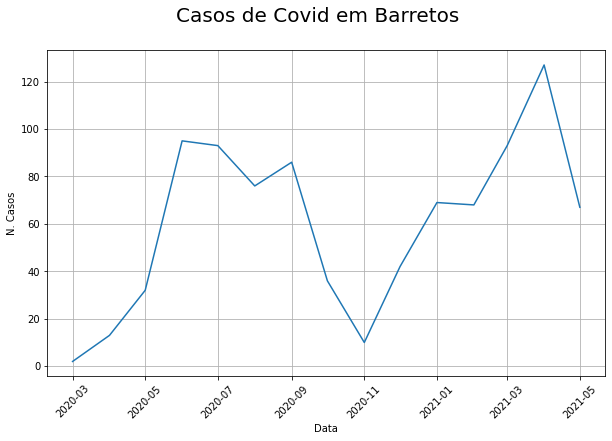

In [186]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid, x= total_covid.index, y= total_covid["BARRETOS"])
plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
#plt.ylim(0, 100)
plt.grid(True)
plt.suptitle("Casos de Covid em Barretos", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Data" , fontsize=10)
plt.show()

### Manipulação de dados com o Melt

In [204]:
#removendo os valores totais por dia.

tc_aberto = total_covid.drop( columns = "total")
tc_aberto.head()

,ADAMANTINA,ADOLFO,AGUAI,AGUAS DA PRATA,AGUAS DE LINDOIA,AGUAS DE SANTA BARBARA,AGUAS DE SAO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINOPOLIS,ALTO ALEGRE,ALUMINIO,ALVARES FLORENCE,ALVARES MACHADO,ALVARO DE CARVALHO,ALVINLANDIA,AMERICANA,AMERICO BRASILIENSE,AMERICO DE CAMPOS,AMPARO,ANALANDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAI,ARACARIGUAMA,ARACATUBA,ARACOIABA DA SERRA,ARAMINA,ARANDU,ARAPEI,ARARAQUARA,ARARAS,ARCO-IRIS,AREALVA,...,TATUI,TAUBATE,TEJUPA,TEODORO SAMPAIO,TERRA ROXA,TIETE,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBE,TRES FRONTEIRAS,TUIUTI,TUPA,TUPI PAULISTA,TURIUBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIAO PAULISTA,URANIA,URU,URUPES,VALENTIM GENTIL,VALINHOS,VALPARAISO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VARZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITORIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS
mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-02-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-03-01,nan,nan,nan,1.000,1.000,nan,nan,3.000,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,5.000,nan,1.000,1.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,7.000,nan,nan,2.000,nan,9.000,1.000,nan,nan,...,2.000,10.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,3.000,2.000,nan,4.000,nan,nan,nan,3.000,6.000,nan
2020-04-01,6.000,nan,4.000,nan,3.000,nan,nan,8.000,nan,nan,nan,nan,nan,nan,nan,3.000,nan,nan,4.000,3.000,nan,3.000,nan,12.000,3.000,nan,nan,nan,nan,nan,4.000,13.000,3.000,nan,2.000,nan,7.000,20.000,nan,1.000,...,15.000,26.000,nan,nan,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,3.000,2.000,nan,nan,nan,3.000,nan,nan,nan,nan,nan,nan,1.000,16.000,nan,nan,nan,8.000,20.000,nan,7.000,1.000,1.000,nan,6.000,2.000,nan
2020-05-01,7.000,1.000,2.000,1.000,1.000,nan,nan,2.000,1.000,2.000,1.000,1.000,1.000,6.000,nan,5.000,1.000,nan,38.000,3.000,nan,16.000,nan,4.000,3.000,nan,1.000,4.000,nan,nan,7.000,24.000,8.000,nan,nan,1.000,9.000,22.000,nan,nan,...,28.000,43.000,nan,4.000,nan,2.000,nan,1.000,1.000,nan,3.000,1.000,nan,8.000,4.000,1.000,1.000,nan,12.000,2.000,2.000,nan,3.000,1.000,nan,1.000,46.000,7.000,1.000,3.000,25.000,42.000,nan,13.000,2.000,1.000,nan,43.000,14.000,1.000


In [205]:
#fazendo o melt com o mesmo df pois eu retirei os valores totais
tc_aberto = tc_aberto.reset_index().melt(id_vars=["mes_ano"], value_vars = tc_aberto.columns)
tc_aberto.columns = ["mes", "cidade", "casos"]
tc_aberto.head()

,mes,cidade,casos
0,2020-01-01,ADAMANTINA,nan
1,2020-02-01,ADAMANTINA,nan
2,2020-03-01,ADAMANTINA,nan
3,2020-04-01,ADAMANTINA,6.000
4,2020-05-01,ADAMANTINA,7.000


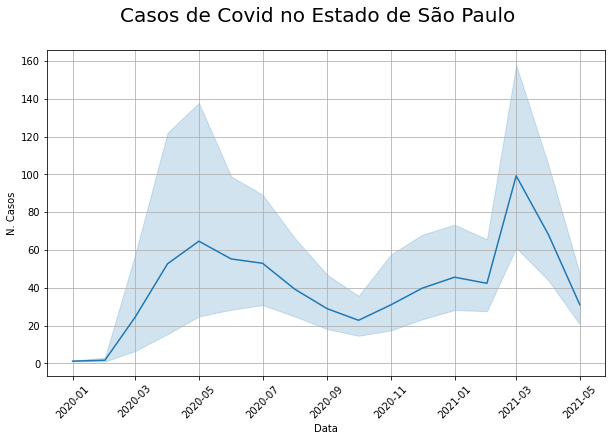

In [206]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=tc_aberto, x= "mes", y= "casos")
plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
#plt.ylim(0, 100)
plt.grid(True)
plt.suptitle("Casos de Covid no Estado de São Paulo", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Data" , fontsize=10)
plt.show()

###Desafios

####Desafio 01
Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.



```
okay
```



####Desafio 02
Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [207]:
tc_aberto.head()

,mes,cidade,casos
0,2020-01-01,ADAMANTINA,nan
1,2020-02-01,ADAMANTINA,nan
2,2020-03-01,ADAMANTINA,nan
3,2020-04-01,ADAMANTINA,6.000
4,2020-05-01,ADAMANTINA,7.000


In [208]:
tc_aberto.pivot(index = "mes", columns= "cidade").head()

casos               ...                                
cidade     ADAMANTINA ADOLFO AGUAI  ... VOTORANTIM VOTUPORANGA ZACARIAS
mes                                 ...                                
2020-01-01        nan    nan   nan  ...        nan         nan      nan
2020-02-01        nan    nan   nan  ...        nan         nan      nan
2020-03-01        nan    nan   nan  ...      3.000       6.000      nan
2020-04-01      6.000    nan 4.000  ...      6.000       2.000      nan
2020-05-01      7.000  1.000 2.000  ...     43.000      14.000    1.000

[5 rows x 645 columns]

####Desafio 03

Melhorar o gráfico da distribuição do gráfico:

*   Escolha apenas alguns estados.
*   Mude a palete de cores.
*   Posicione a legenda de forma mais adequada.
*   Adicione título principal e nos eixos x e y.

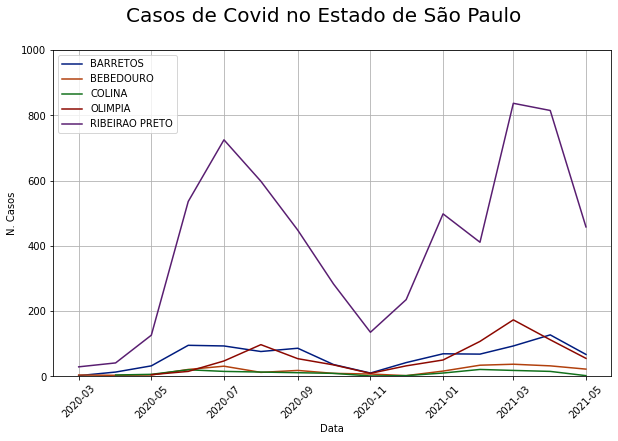

In [209]:
plt.figure(figsize=(10,6))
#ax = sns.lineplot(data=tc_aberto.loc[(tc_aberto.cidade == "COLINA") | (tc_aberto.cidade == "BARRETOS")], x= "mes", y= "casos", hue = "cidade")
ax = sns.lineplot(data=tc_aberto[tc_aberto["cidade"].isin(["COLINA","BARRETOS","RIBEIRAO PRETO","OLIMPIA","BEBEDOURO"])], x= "mes", y= "casos", hue = "cidade", palette = "dark")
plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
plt.ylim(0, 1000)
plt.grid(True)
plt.suptitle("Casos de Covid no Estado de São Paulo", fontsize=20)
plt.legend(loc = 0)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Data" , fontsize=10)
plt.show()

Comparando os gráficos com o "Hue" e sem.

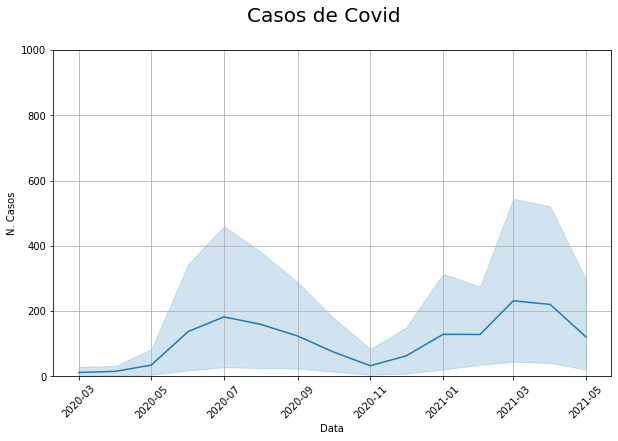

In [210]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=tc_aberto[tc_aberto["cidade"].isin(["COLINA","BARRETOS","RIBEIRAO PRETO","OLIMPIA","BEBEDOURO"])], x= "mes", y= "casos", palette = "dark")
plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base= 3, offset= 0))
plt.ylim(0, 1000)
plt.grid(True)
plt.suptitle("Casos de Covid", fontsize=20)
#plt.legend(loc = 0)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Data" , fontsize=10)
plt.show()

##Aula 5 - Tratamento, exploração e visualização de dados

###Criando tabelas evolutivas (dia)

In [211]:
dados_srag.head()

,idade,g_idade,sexo,cor,evolucao,dt_notificacao,ano,mes,mes_ano
cidade,,,,,,,,,
SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-08,2020,8,Aug/2020
HORTOLANDIA,71,70,Feminino,Parda,Cura,2020-08-11,2020,8,Aug/2020
SAO PAULO,71,70,Feminino,Parda,Cura,2020-08-12,2020,8,Aug/2020
CARAGUATATUBA,71,70,Feminino,Parda,Cura,2020-08-14,2020,8,Aug/2020
GUARULHOS,71,70,Feminino,Parda,Cura,2020-08-19,2020,8,Aug/2020


In [212]:
total_covid_d = bd_srag.sort_values(by='dt_notificacao').groupby(["dt_notificacao", "cidade"], sort = False).size().to_frame()
total_covid_d.columns = ["casos"]
total_covid_d = total_covid_d.reset_index()


#crindo o df com as cidades na coluna
total_covid_d_a = total_covid_d.pivot(index = "dt_notificacao", columns = "cidade")

#exibindo o df que vou trabalhar
total_covid_d.head()


,dt_notificacao,cidade,casos
0,2020-01-02,INDAIATUBA,1
1,2020-01-02,ARUJA,1
2,2020-01-06,ITAPETININGA,1
3,2020-01-07,OSASCO,1
4,2020-01-10,SAO BERNARDO DO CAMPO,1


In [213]:
#apenas checando o df com as cidades na coluna
total_covid_d_a.head()

casos               ...                                
cidade         ADAMANTINA ADOLFO AGUAI  ... VOTORANTIM VOTUPORANGA ZACARIAS
dt_notificacao                          ...                                
2020-01-02            nan    nan   nan  ...        nan         nan      nan
2020-01-06            nan    nan   nan  ...        nan         nan      nan
2020-01-07            nan    nan   nan  ...        nan         nan      nan
2020-01-10            nan    nan   nan  ...        nan         nan      nan
2020-01-12            nan    nan   nan  ...        nan         nan      nan

[5 rows x 645 columns]

In [214]:
#Como já tinha feito a conversão para datetime anteriormente não preciso fazer novamente
total_covid_d["dt_notificacao"].head()

0   2020-01-02
1   2020-01-02
2   2020-01-06
3   2020-01-07
4   2020-01-10
Name: dt_notificacao, dtype: datetime64[ns]

###Criando colunas de anos e meses

In [215]:
total_covid_d["mes"] = total_covid_d["dt_notificacao"].dt.month
total_covid_d["ano"] = total_covid_d["dt_notificacao"].dt.year
total_covid_d.head()

,dt_notificacao,cidade,casos,mes,ano
0,2020-01-02,INDAIATUBA,1,1,2020
1,2020-01-02,ARUJA,1,1,2020
2,2020-01-06,ITAPETININGA,1,1,2020
3,2020-01-07,OSASCO,1,1,2020
4,2020-01-10,SAO BERNARDO DO CAMPO,1,1,2020


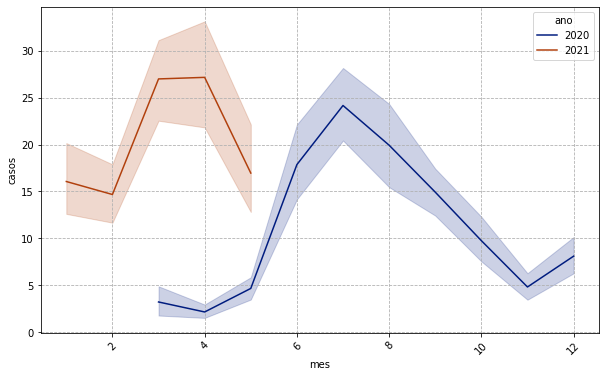

In [216]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=total_covid_d.query("cidade == 'RIBEIRAO PRETO'"), x= "mes", y= "casos", hue = "ano",  palette = "dark")
plt.xticks(rotation=45)
#plt.ylim(0, 1000)
plt.grid(linestyle = "--")
#plt.suptitle("Casos de Covid", fontsize=20)
#plt.legend(loc = 0)
#plt.ylabel("N. Casos", fontsize=10)
#plt.xlabel( "Data" , fontsize=10)
plt.show()

Usando df "tc_aberto" pois é o df que tem valores por mês e não por dia.

In [217]:
tc_aberto = tc_aberto.rename(columns={"mes" : "data"})
tc_aberto["data"] = tc_aberto["data"].astype('datetime64')
tc_aberto["mes"] = tc_aberto["data"].dt.month
tc_aberto["ano"] = tc_aberto["data"].dt.year
tc_aberto.head(10)

,data,cidade,casos,mes,ano
0,2020-01-01,ADAMANTINA,nan,1,2020
1,2020-02-01,ADAMANTINA,nan,2,2020
2,2020-03-01,ADAMANTINA,nan,3,2020
3,2020-04-01,ADAMANTINA,6.000,4,2020
4,2020-05-01,ADAMANTINA,7.000,5,2020
5,2020-06-01,ADAMANTINA,6.000,6,2020
6,2020-07-01,ADAMANTINA,8.000,7,2020
7,2020-08-01,ADAMANTINA,13.000,8,2020
8,2020-09-01,ADAMANTINA,9.000,9,2020
9,2020-10-01,ADAMANTINA,9.000,10,2020


In [220]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

tc_aberto["diario"] = tc_aberto["casos"] / tc_aberto["mes"].map(dias_por_mes)
tc_aberto.head(10)

,data,cidade,casos,mes,ano,diario
0,2020-01-01,ADAMANTINA,nan,1,2020,nan
1,2020-02-01,ADAMANTINA,nan,2,2020,nan
2,2020-03-01,ADAMANTINA,nan,3,2020,nan
3,2020-04-01,ADAMANTINA,6.000,4,2020,0.200
4,2020-05-01,ADAMANTINA,7.000,5,2020,0.226
5,2020-06-01,ADAMANTINA,6.000,6,2020,0.200
6,2020-07-01,ADAMANTINA,8.000,7,2020,0.258
7,2020-08-01,ADAMANTINA,13.000,8,2020,0.419
8,2020-09-01,ADAMANTINA,9.000,9,2020,0.300
9,2020-10-01,ADAMANTINA,9.000,10,2020,0.290


In [221]:
desc_mes = {
    1 : "Jan",
    2 : "Fev",
    3 : "Mar",
    4 : "Abr",
    5 : "Mai",
    6 : "Jun",
    7 : "Jul",
    8 : "Ago",
    9 : "Set",
    10 : "Out",
    11 : "Nov",
    12 : "Dez"
}

tc_aberto["desc_mes"] = tc_aberto["mes"].map(desc_mes)
tc_aberto.head(10)

,data,cidade,casos,mes,ano,diario,desc_mes
0,2020-01-01,ADAMANTINA,nan,1,2020,nan,Jan
1,2020-02-01,ADAMANTINA,nan,2,2020,nan,Fev
2,2020-03-01,ADAMANTINA,nan,3,2020,nan,Mar
3,2020-04-01,ADAMANTINA,6.000,4,2020,0.200,Abr
4,2020-05-01,ADAMANTINA,7.000,5,2020,0.226,Mai
5,2020-06-01,ADAMANTINA,6.000,6,2020,0.200,Jun
6,2020-07-01,ADAMANTINA,8.000,7,2020,0.258,Jul
7,2020-08-01,ADAMANTINA,13.000,8,2020,0.419,Ago
8,2020-09-01,ADAMANTINA,9.000,9,2020,0.300,Set
9,2020-10-01,ADAMANTINA,9.000,10,2020,0.290,Out


###Desafios

####Desafio 01

Melhorar o gráfico ano a ano:

*   Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

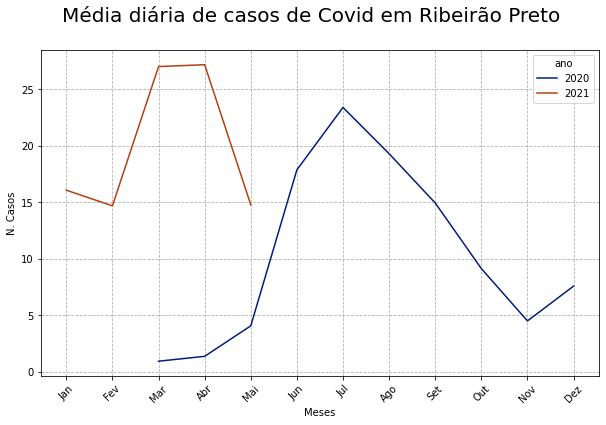

In [227]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=tc_aberto.query("cidade == 'RIBEIRAO PRETO'"), x= "desc_mes", y= "diario", hue = "ano",  palette = "dark")
plt.xticks(rotation=45)
#plt.ylim(0, 1000)
plt.grid(linestyle = "--")
plt.suptitle("Média diária de casos de Covid em Ribeirão Preto", fontsize=20)
#plt.legend(loc = 0)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Meses" , fontsize=10)
plt.show()

####Desafio 02

Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

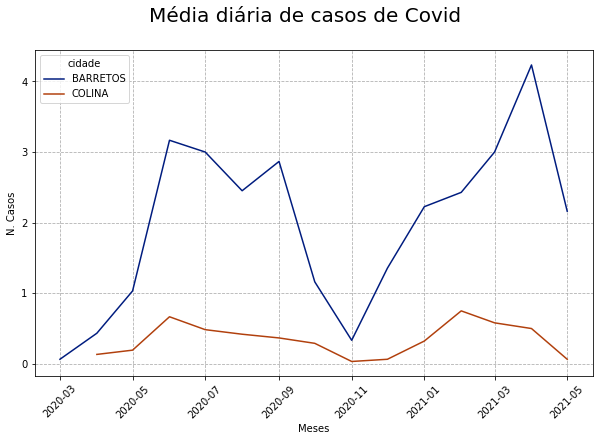

In [237]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=tc_aberto[tc_aberto["cidade"].isin(["COLINA", "BARRETOS"])], x= "data", y= "diario", hue = "cidade",  palette = "dark")
plt.xticks(rotation=45)
#plt.ylim(0, 1000)
plt.grid(linestyle = "--")
plt.suptitle("Média diária de casos de Covid", fontsize=20)
#plt.legend(loc = 0)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Meses" , fontsize=10)
plt.show()

##Aula 6 - Agrupando e Analisando por Categoria

###Agrupamento

Fazendo apenas para seguir a aula, já utilizei o groupby várias vezes no projeto.

In [240]:
tc_aberto_ano = tc_aberto.groupby("ano").sum()
tc_aberto_ano

,casos,mes,diario
ano,,,
2020,182536.000,50310,5965.319
2021,167049.000,9675,5515.358


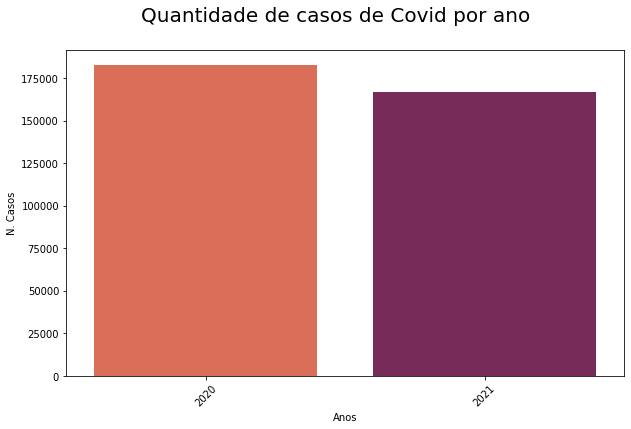

In [244]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=tc_aberto_ano, x = tc_aberto_ano.index, y = "casos", palette=sns.color_palette("rocket_r", 2))
plt.xticks(rotation=45)
plt.suptitle("Quantidade de casos de Covid por ano", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Anos" , fontsize=10)
plt.show()

Como tenho poucos anos, farei usando os meses

In [245]:
tc_aberto_mes = tc_aberto.groupby("data").sum()
tc_aberto_mes

,casos,mes,ano,diario
data,,,,
2020-01-01,7.000,645,1302900,0.226
2020-02-01,5.000,1290,1302900,0.179
2020-03-01,4162.000,1935,1302900,134.258
2020-04-01,15494.000,2580,1302900,516.467
2020-05-01,25408.000,3225,1302900,819.613
2020-06-01,26577.000,3870,1302900,885.900
2020-07-01,28344.000,4515,1302900,914.323
2020-08-01,20589.000,5160,1302900,664.161
2020-09-01,15149.000,5805,1302900,504.967


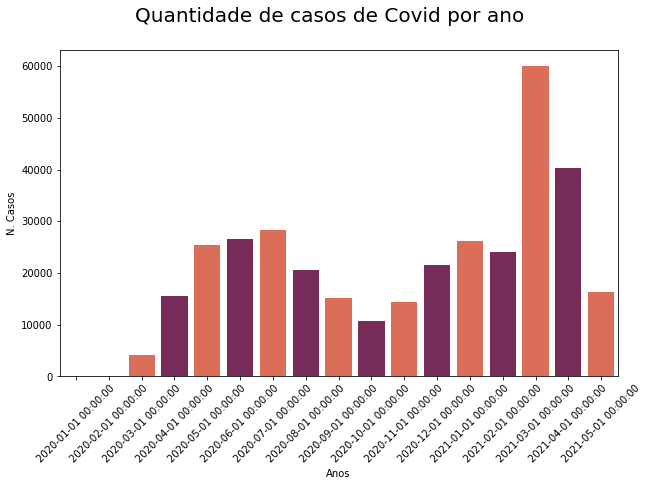

In [246]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=tc_aberto_mes, x = tc_aberto_mes.index, y = "casos", palette=sns.color_palette("rocket_r", 2))
plt.xticks(rotation=45)
plt.suptitle("Quantidade de casos de Covid por ano", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "Anos" , fontsize=10)
plt.show()

In [250]:
cid_graf = ["COLINA", "BARRETOS", "RIBEIRAO PRETO"]

por_ano_cidades = tc_aberto.query("cidade in @cid_graf").groupby(["cidade", "ano"]).mean().reset_index()
por_ano_cidades.head(6)

,cidade,ano,casos,mes,diario
0,BARRETOS,2020,48.500,6.500,1.586
1,BARRETOS,2021,84.800,3.000,2.810
2,COLINA,2020,9.000,6.500,0.295
3,COLINA,2021,13.200,3.000,0.444
4,RIBEIRAO PRETO,2020,315.600,6.500,10.305
5,RIBEIRAO PRETO,2021,603.800,3.000,19.937


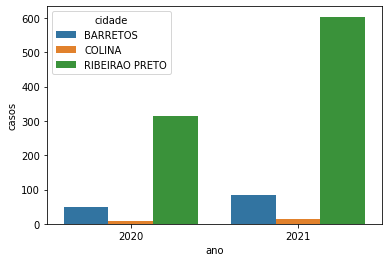

In [251]:
sns.barplot(data=por_ano_cidades, x="ano", y="casos", hue="cidade")

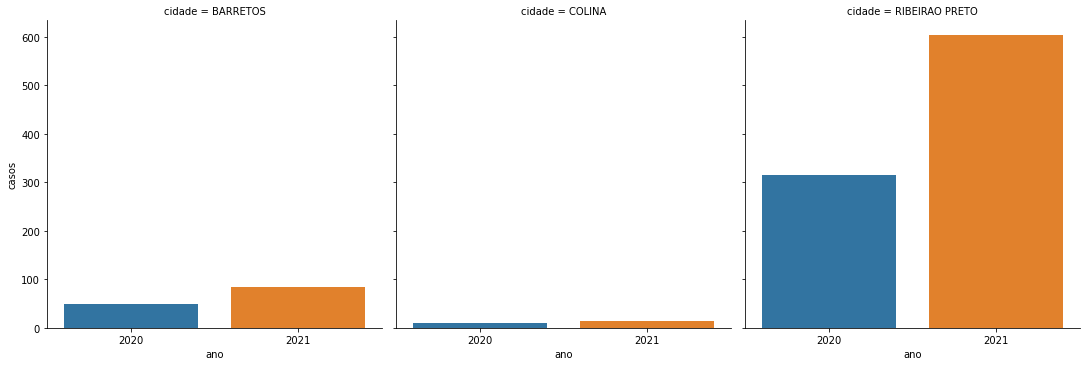

In [254]:
sns.catplot(data=por_ano_cidades, x="ano", y="casos", col="cidade", kind="bar")

In [288]:
#Colocando uma leitura melhor para o grafico
por_mes_cidades["mes_ano"] = por_mes_cidades["data"].dt.strftime('%b/%Y')

por_mes_cidades.head()

,cidade,data,casos,mes,ano,diario,mes_ano
0,BARRETOS,2020-01-01,nan,1,2020,nan,Jan/2020
1,BARRETOS,2020-02-01,nan,2,2020,nan,Feb/2020
2,BARRETOS,2020-03-01,2.000,3,2020,0.065,Mar/2020
3,BARRETOS,2020-04-01,13.000,4,2020,0.433,Apr/2020
4,BARRETOS,2020-05-01,32.000,5,2020,1.032,May/2020


<Figure size 720x432 with 0 Axes>

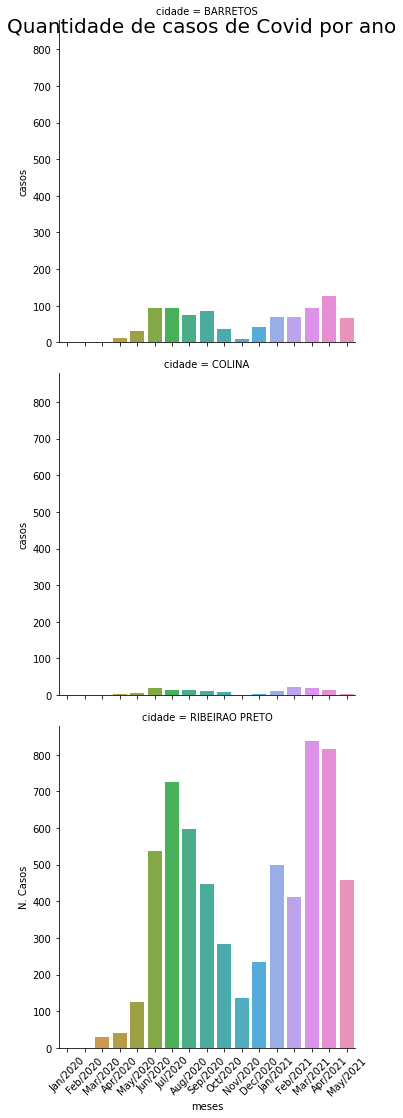

In [289]:
plt.figure(figsize=(10,6))
sns.catplot(data=por_mes_cidades, x="mes_ano", y="casos", row="cidade", kind="bar")
plt.xticks(rotation=45)
plt.suptitle("Quantidade de casos de Covid por ano", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "meses" , fontsize=10)
plt.show()

###Desafios

####Desafio 01

Reordenar as cores pelo valor do eixo y.

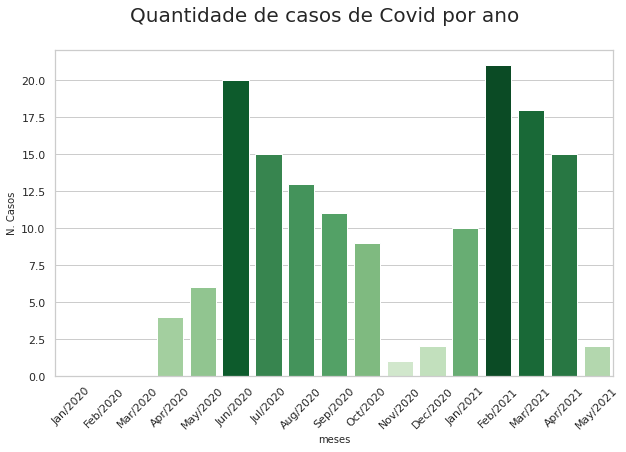

In [326]:
import numpy as np

dados_graf = por_mes_cidades.query("cidade == 'COLINA'")
rank = np.argsort(dados_graf["casos"], axis = 1)
rank = np.argsort(rank, axis = 1)
pal = sns.color_palette("Greens_r", len(rank))

plt.figure(figsize=(10,6))
sns.barplot(data=dados_graf, x="mes_ano", y="casos", palette = np.array(pal[::-1])[rank])
plt.xticks(rotation=45)
plt.suptitle("Quantidade de casos de Covid por ano", fontsize=20)
plt.ylabel("N. Casos", fontsize=10)
plt.xlabel( "meses" , fontsize=10)

plt.show()

####Desafio 02

Explorar a documentação do Seaborn.



```
Feito
```



####Desafio 03

Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

####Desafio 04

Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.